In [ ]:
Experiment No - 03

Name - Sourabh Powade
Prn - 22sc114501053
roll no - 48
Class - Btech AIML A1
Title - Transparency in AI Decision-Making

Decision Tree Accuracy: 0.7814272917288743
Random Forest Accuracy: 0.8411466109286354

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1742
           1       0.75      0.82      0.78      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1742
           1       0.81      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



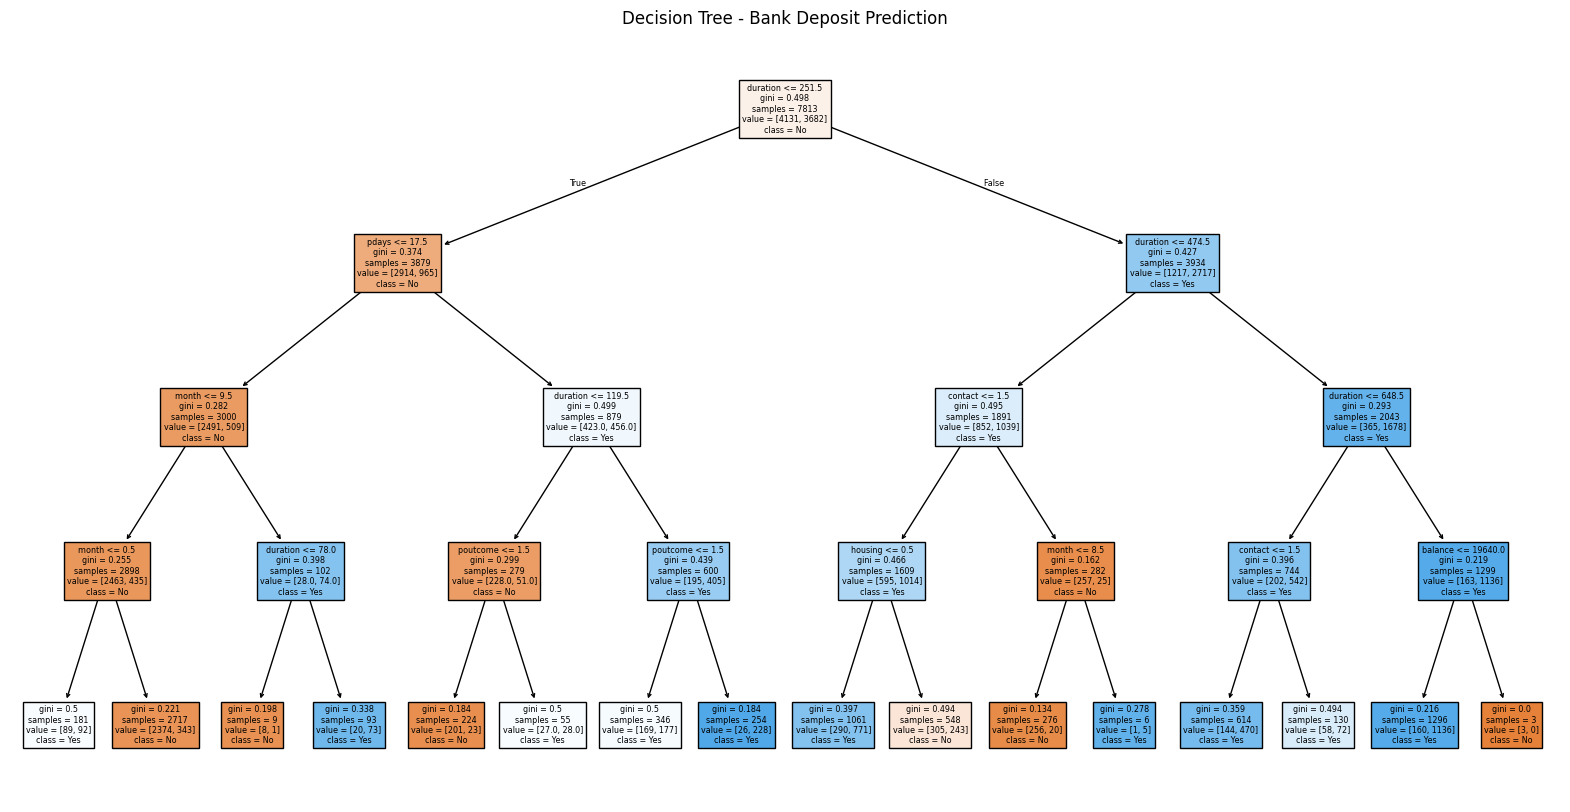

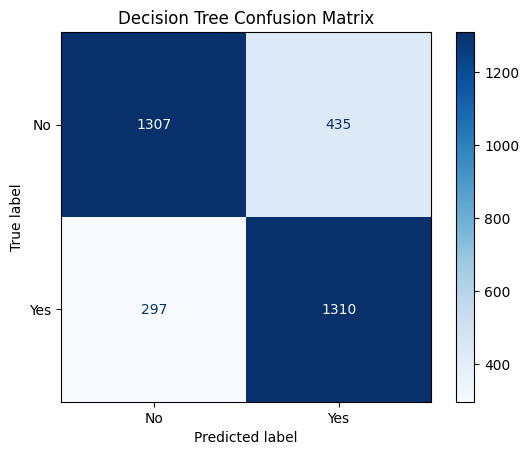

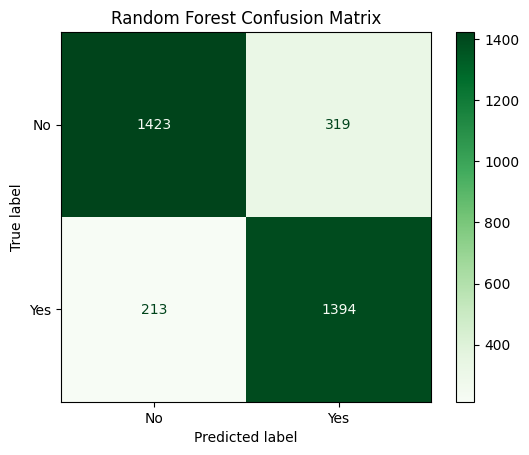

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load your dataset
df = pd.read_csv("/content/bank.csv")

# Encode target variable ('deposit': yes = 1, no = 0)
df['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})

# Label encode all categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split into features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Train Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Accuracy scores
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))

# Classification Reports
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree - Bank Deposit Prediction")
plt.show()

# Confusion Matrix - Decision Tree
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, display_labels=["No", "Yes"], cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Confusion Matrix - Random Forest
ConfusionMatrixDisplay.from_estimator(forest, X_test, y_test, display_labels=["No", "Yes"], cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()
